# Business Case : Salaire dans les métiers de la data

## Introduction
Dans cette analyse, nous allons explorer les différentes caractéristiques (***salaire, type d'emploi, localisation, etc.***) des métiers dans le domaine de la **data** pour fournir des recommandations sur l’emplacement d’un nouveau bureau pour notre client : un cabinet spécialisé dans les métiers de la **data**.

Nous allons utiliser des données provenant de différents profils d’emploi pour **proposer des insights clairs sur les tendances salariales et les choix de localisations les plus intéressants**.

---

## Objectifs

L'objectif de cette analyse est de répondre aux questions suivantes :

- Quels sont les différents types d'emplois dans le domaine des données ?

- Quelle est la tendance salariale dans les métiers de la data ?

- Quels profils privilégier pour l'implantation d'un nouveau bureau ?

- Quelles recommandations peuvent être faites pour la prise de décision stratégique sur la localisation du futur bureau ?

## Plan d'exécution

- 1. Exploration et Nettoyage des données
- 2. Analyse Sémantique - Clusterisation des métiers Data
- 3. DataVisualisation et Analyse
- 4. Recommandations et Conclusion

---

## Résolution

### **1. Exploration et Nettoyage des données**

#### **1.1 Chargement des données**

In [1]:
import pandas as pd

# Charger le dataset
url = "./Business-Case-Salaire-Metiers-Data_files/salaries.csv"
df = pd.read_csv(url)

#### **1.2 Description des données**

In [2]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Architect,378700,USD,378700,US,0,US,M
1,2025,SE,FT,Architect,252400,USD,252400,US,0,US,M
2,2025,EN,FT,Data Analyst,48000,USD,48000,US,0,US,M
3,2025,EN,FT,Data Analyst,38000,USD,38000,US,0,US,M
4,2025,EN,FT,Data Analyst,78000,USD,78000,CA,0,CA,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73484 entries, 0 to 73483
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73484 non-null  int64 
 1   experience_level    73484 non-null  object
 2   employment_type     73484 non-null  object
 3   job_title           73484 non-null  object
 4   salary              73484 non-null  int64 
 5   salary_currency     73484 non-null  object
 6   salary_in_usd       73484 non-null  int64 
 7   employee_residence  73484 non-null  object
 8   remote_ratio        73484 non-null  int64 
 9   company_location    73484 non-null  object
 10  company_size        73484 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.2+ MB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73484.000000,7.348400e+04,73484.000000,73484.000000
mean,2023.836536,1.625598e+05,157963.523733,21.563197
std,0.482939,1.927610e+05,72499.859959,41.009892
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.068000e+05,106800.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [5]:
# Vérifier les valeurs manquantes
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Supprimer les doublons
df = df.drop_duplicates()

Voici les premières informations du dataset après avoir le chargement et une première exploration des données :

- Il y a un total de 607 enregistrements dans le dataset.
- Aucune valeur manquante
- Les doublons éventuels ont été supprimés.

##### **Description des variables**

1. **`work_year`** : Année de l'observation, utile pour analyser les tendances temporelles des salaires.
2. **`experience_level`** : Niveau d'expérience (Junior, Mid-Level, Senior, ***abréviations***)), permet de comparer les salaires selon l'expérience.
3. **`employment_type`** : Type de contrat (CDI, CDD, Freelance, ***abréviations anglaises***) important pour analyser l'impact du statut sur les salaires.
4. **`job_title`** : Intitulé du poste (Data Analyst, Data Scientist, etc.), essentiel pour comparer les salaires entre les différents métiers.
5. **`salary`** : Salaire brut annuel (devise locale), variable principale de l'analyse.
6. **`salary_currency`** : Devise du salaire (***abréviation devise***), utile pour les conversions monétaires.
7. **`salary_in_usd`** : Salaire en USD (***US Dollars***), standardisé pour les comparaisons internationales.
8. **`employee_residence`** : Localisation de l'employé (***abréviation pays***), aide à analyser l'impact géographique sur les salaires.
9. **`remote_ratio`** : Ratio de télétravail (***en %***), permet d'examiner l'impact du télétravail sur les salaires.
10. **`company_location`** : Localisation de l'entreprise (***abréviation pays***), utile pour l'analyse géographique des salaires.
11. **`company_size`** : Taille de l'entreprise (***Small, Medium, Large***), permet d'analyser l'impact de la taille de l'entreprise sur les salaires.

##### **Variables principales pour l'analyse :**
- **`work_year`**
- **`experience_level`**
- **`employment_type`**
- **`job_title`**
- **`salary_in_usd`**
- **`remote_ratio`**
- **`company_location`**
- **`company_size`**

#### **1.3 Analyse préliminaire**

<Axes: title={'center': ' Top 10 Répartition des métiers'}, xlabel='job_title'>

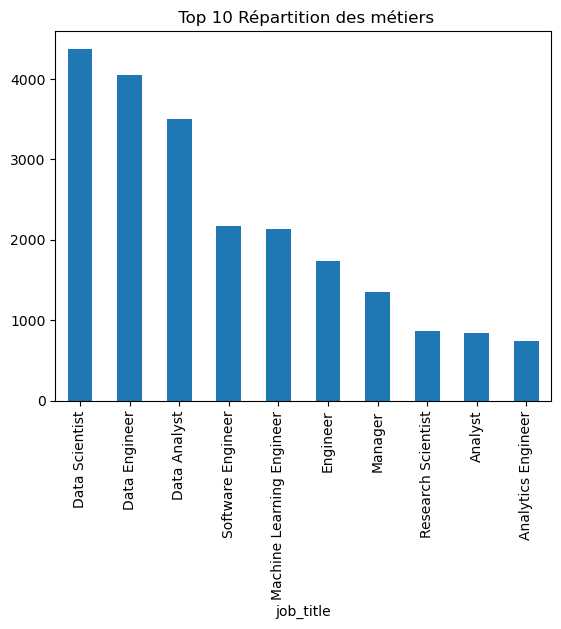

In [7]:
# Répartition des métiers
df['job_title'].value_counts().head(10).plot(kind='bar', title=' Top 10 Répartition des métiers')


<Axes: title={'center': 'Répartition des types de contrat'}, xlabel='employment_type'>

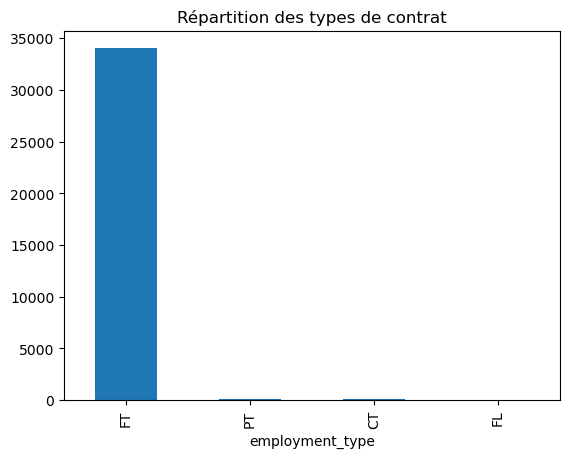

In [8]:
# Répartition des types de contrat
df['employment_type'].value_counts().plot(kind='bar', title='Répartition des types de contrat')

**Signification des abréviations** :

- **FT** : Full-Time (CDI Temps plein)
- **PT** : Part-Time (CDI Temps partiel)
- **CT** : Contract (CDD)
- **FL** : Freelance

<Axes: title={'center': "Répartition des niveaux d'expérience"}, xlabel='experience_level'>

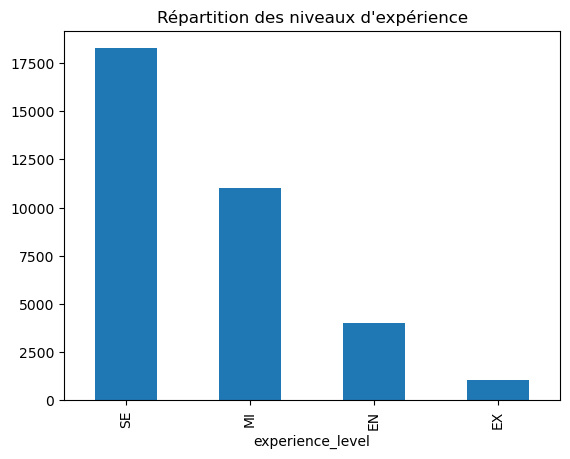

In [9]:
# Répartition des niveaux d'expérience
df['experience_level'].value_counts().plot(kind='bar', title="Répartition des niveaux d'expérience")

**Signification des abréviations** :

- **EX** : Executive (Poste de direction)
- **SE** : Senior
- **MI** : Niveau Intermédiaire
- **EN** : Junior - Débutant

<Axes: title={'center': 'Répartition de la taille des entreprises'}, xlabel='company_size'>

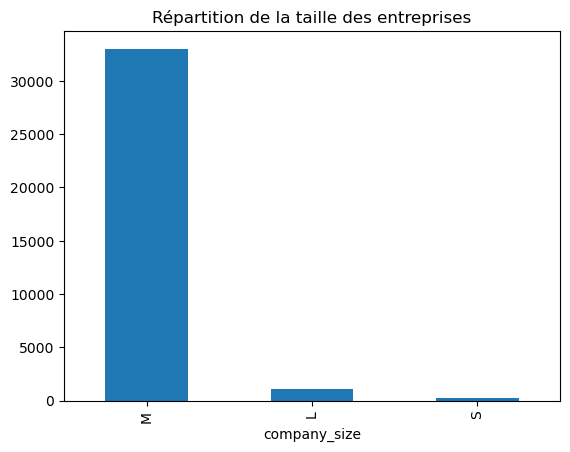

In [10]:
# Répartition de la taille des entreprises
df['company_size'].value_counts().plot(kind='bar', title='Répartition de la taille des entreprises')

<Axes: title={'center': 'Top 10 des localisations des entreprises'}, xlabel='company_location'>

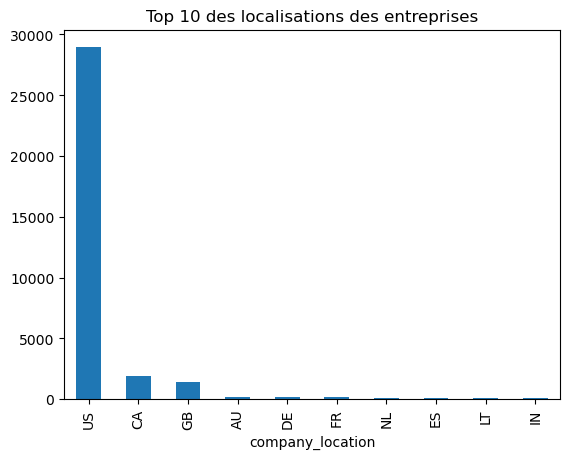

In [11]:
# Répartition géographique
df['company_location'].value_counts().head(10).plot(kind='bar', title='Top 10 des localisations des entreprises')

##### **Conclusion Analyse Préliminaire :**

L'analyse préliminaire montre les résultats suivants :

- **Répartition des métiers** : Nous avons observé que les postes les plus fréquents sont **Data Scientist, Data Engineer et Data Analyst**.

- **Répartition des contrats** : Les contrats CDI sont largement dominants.

- **Répartition de la taille des entreprises** : Les entreprises de taille moyenne sont les principales entreprises du dataset.

- **Répartition géographique** : Les entreprises sont majoritairement situées aux ***Etats Unis, puis Grande Bretagne, Canada***.

#### **1.4 Préparation du DataFrame**

Pour rendre le dataset plus clair, plus accessible en vue de l'analyse PowerBi ; nous allons attribuer des noms clairs et compréhensibles en français.

##### **1.4.1 Intitulé des Colonnes**

In [12]:
# Renommer les colonnes
df.rename(columns={
    'work_year': 'année',
    'experience_level': 'niveau_experience',
    'employment_type': 'type_contrat',
    'job_title': 'intitulé_poste',
    'salary': 'salaire',
    'salary_currency': 'devise_salaire',
    'salary_in_usd': 'salaire_usd',
    'employee_residence': 'résidence_employé',
    'remote_ratio': 'télétravail_ratio',
    'company_location': 'localisation_entreprise',
    'company_size': 'taille_entreprise'
}, inplace=True)

In [13]:
# Supprimer les colonnes inutiles
df.drop(columns=['salaire', 'devise_salaire', 'résidence_employé'], inplace=True)

In [14]:
df.rename(columns={'salaire_usd' : 'salaire'}, inplace=True)

##### **1.4.2 Remplacement des valeurs**

In [15]:
# Niveau d'expérience
df['niveau_experience'] = df['niveau_experience'].replace({
    'SE': 'Sénior',
    'MI': 'Intermédiaire',
    'EN': 'Junior',
    'EX': 'Expert'
})

In [16]:
# Type de contrat
df['type_contrat'] = df['type_contrat'].replace({
    'FT': 'CDI Temps plein',
    'PT': 'CDI Temps partiel',
    'CT': 'CDD',
    'FL': 'Freelance'
})

In [17]:
df.sample(5)

,année,niveau_experience,type_contrat,intitulé_poste,salaire,télétravail_ratio,localisation_entreprise,taille_entreprise
2068,2024,Junior,CDI Temps plein,Data Scientist,139360,0,US,M
64108,2023,Sénior,CDI Temps plein,Data Engineer,106500,0,US,M
21034,2024,Sénior,CDI Temps plein,Research Scientist,234500,0,US,M
72506,2022,Sénior,CDI Temps plein,Data Scientist,207000,100,US,M
37908,2024,Intermédiaire,CDI Temps plein,BI Analyst,185000,0,US,M


##### **1.4.4 Export #1 du DataFrame pour l'utilisation PowerBi** - ***(Point d'Etape)***

In [18]:
# Réinitialiser les index
df.reset_index(drop=True, inplace=True)

# Exporter en CSV
df.to_csv('./Business-Case-Salaire-Metiers-Data_files/salaire_metiers_data.csv', index=False, encoding='utf-8')

---

### **2. Analyse Sémantique - Clusterisation des métiers Data**

#### **2.1 Analyse Sémantique des métiers**

**Objectif :**

L’analyse sémantique des intitulés de poste a pour objectif de **regrouper les métiers similaires en identifiant des mots-clés récurrents**.

Cette catégorisation permet de simplifier l’analyse en **créant des clusters homogènes de métiers**, facilitant ainsi l’observation des tendances et des comparaisons sur des critères comme les salaires, les types de contrats ou les ratios de télétravail.

Par exemple, regrouper des métiers comme "Data Scientist", "Data Analyst" et "Data Engineer" sous des catégories pertinentes permet de **dégager des insights globaux, tout en rendant les résultats plus lisibles et exploitables**, notamment pour des visualisations dans Power BI.

**Méthodologie** :

Nous allons d'abord extraire les mots les plus fréquents dans la colonne intitulé_poste pour identifier les mots-clés représentatifs des métiers.

Cela nous servira à regrouper les métiers en clusters.

1. **Lister les mots-clés fréquents** : 
- Tokenisation des intitulés pour obtenir les mots les plus courants.
- Création d’un histogramme ou d’un nuage de mots pour visualiser les fréquences.

2. **Définir les clusters de métiers** :

Exemple :
- Catégorie "Data Science" : contient "Data Scientist", "ML Engineer".
- Catégorie "Data Engineering" : contient "Data Engineer", "Big Data".
- Catégorie "Analyse" : contient "Data Analyst", "BI Analyst".

Création d'une colonne `catégorie` :

- Basé sur les mots-clés identifiés, une nouvelle colonne sera ajoutée avec des catégories comme "Data Science", "Data Engineering", "Analyse", etc.


##### **2.1.1 Tokenisation simple**

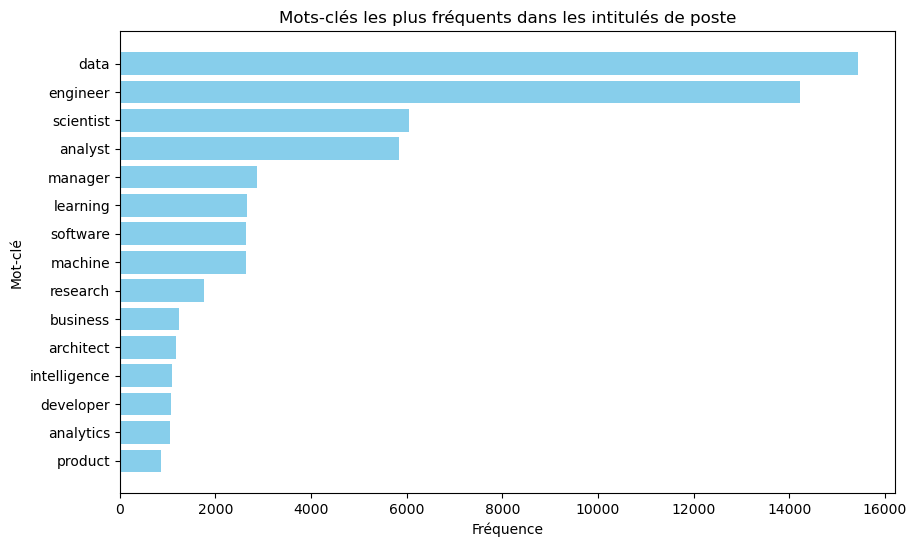

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenisation des mots dans les intitulés de poste
mots = df['intitulé_poste'].str.lower().str.split(expand=True).stack()
compte_mots = Counter(mots)

# Les 10 mots les plus fréquents
mots_frequents = compte_mots.most_common(15)

# Affichage d'un histogramme
mots, frequences = zip(*mots_frequents)
plt.figure(figsize=(10, 6))
plt.barh(mots, frequences, color='skyblue')
plt.xlabel("Fréquence")
plt.ylabel("Mot-clé")
plt.title("Mots-clés les plus fréquents dans les intitulés de poste")
plt.gca().invert_yaxis()
plt.show()

In [20]:
mots_frequents

[('data', 15435),
 ('engineer', 14216),
 ('scientist', 6040),
 ('analyst', 5849),
 ('manager', 2867),
 ('learning', 2655),
 ('software', 2648),
 ('machine', 2646),
 ('research', 1768),
 ('business', 1234),
 ('architect', 1168),
 ('intelligence', 1092),
 ('developer', 1079),
 ('analytics', 1052),
 ('product', 871)]

##### **2.1.2 Lemmatisation**

In [21]:
import spacy
from collections import Counter

# Charger le modèle de lemmatisation de spaCy
nlp = spacy.load("en_core_web_sm")

# Fonction pour extraire les lemmes des intitulés
def lemmatiser_texte(texte):
    doc = nlp(texte.lower())  # Convertir en minuscules et analyser avec spaCy
    return " ".join([token.lemma_ for token in doc if not token.is_stop])  # Lemmatisation sans les mots outils

# Appliquer la lemmatisation sur les intitulés
df['intitulé_poste_lemmatise'] = df['intitulé_poste'].apply(lemmatiser_texte)

# Vérifier les résultats
print(df[['intitulé_poste', 'intitulé_poste_lemmatise']].sample(5))

# Analyse des mots fréquents après lemmatisation
mots_lemmatises = " ".join(df['intitulé_poste_lemmatise'])
compteur_mots = Counter(mots_lemmatises.split())
print(compteur_mots.most_common(15))


                         intitulé_poste          intitulé_poste_lemmatise
18909                      Data Analyst                      data analyst
32328         Machine Learning Engineer            machine learn engineer
14853            Master Data Management           master datum management
26549  Business Intelligence Specialist  business intelligence specialist
6282                    Product Manager                   product manager
[('engineer', 14216), ('data', 13092), ('scientist', 6040), ('analyst', 5849), ('manager', 2867), ('software', 2648), ('machine', 2646), ('learn', 2372), ('datum', 2343), ('research', 1768), ('business', 1234), ('architect', 1168), ('intelligence', 1092), ('developer', 1079), ('analytic', 1052)]


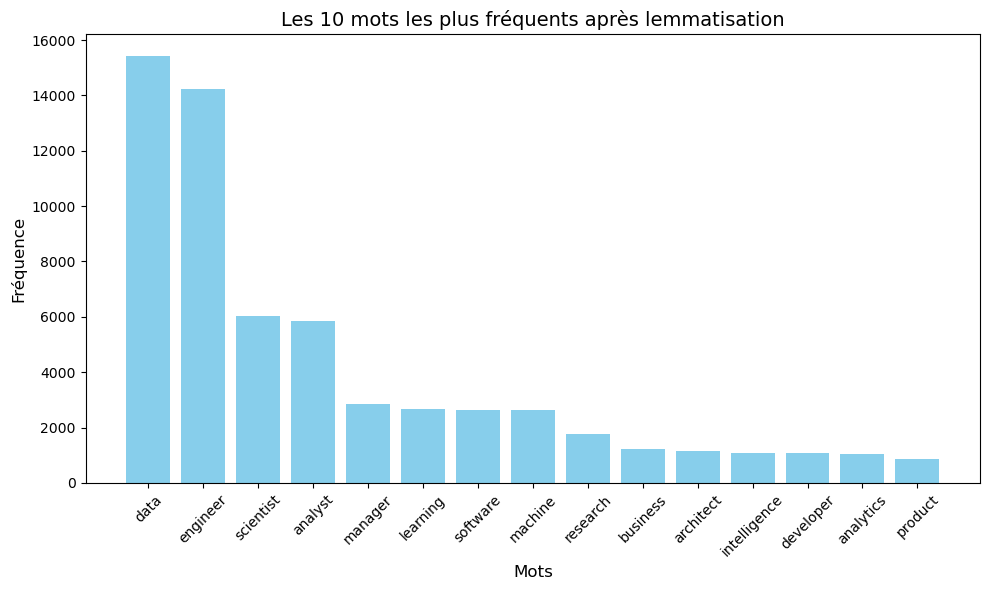

In [22]:
# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(mots, frequences, color='skyblue')
plt.title("Les 10 mots les plus fréquents après lemmatisation", fontsize=14)
plt.ylabel("Fréquence", fontsize=12)
plt.xlabel("Mots", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **2.2 Clusterisation des métiers Data**

**Analyse des résultats et définition des clusters de métiers**

Les mots les plus fréquents révèlent des catégories distinctes de métiers dans le domaine de la data. Voici une proposition de clusters enrichis en fonction des nouveaux mots identifiés :

1. **Catégorie "Ingénierie des données"**  
   - **Mots-clés** : engineer, developer  
   - **Exemples de métiers** : Data Engineer, Big Data Developer, Data Infrastructure Engineer  

2. **Catégorie "Science des données"**  
   - **Mots-clés** : scientist, machine, learning, research  
   - **Exemples de métiers** : Data Scientist, Machine Learning Engineer, Research Scientist  

3. **Catégorie "Analyse des données"**  
   - **Mots-clés** : analyst, business, specialist  
   - **Exemples de métiers** : Data Analyst, Business Analyst, BI Specialist  

4. **Catégorie "Gestion et management"**  
   - **Mots-clés** : manager, consultant, product  
   - **Exemples de métiers** : Data Manager, Analytics Consultant, Product Manager  

5. **Catégorie "Technologie et développement logiciel"**  
   - **Mots-clés** : software, technician  
   - **Exemples de métiers** : Software Developer, Data Technician, Backend Developer  

In [23]:
# Définir les catégories basées sur les mots-clés
def attribuer_categorie(metier):
    metier = metier.lower()
    
    # Définir les mots-clés pour chaque catégorie
    if any(keyword in metier for keyword in ['engineer', 'developer', 'software']):
        return 'Ingénierie des données'
    elif any(keyword in metier for keyword in ['scientist', 'machine', 'learning', 'research']):
        return 'Science des données'
    elif any(keyword in metier for keyword in ['analyst', 'business', 'specialist']):
        return 'Analyse des données'
    elif any(keyword in metier for keyword in ['manager', 'consultant', 'product']):
        return 'Gestion et management'
    else:
        return 'Autre'

# Appliquer la fonction pour créer la colonne catégorie
df['catégorie'] = df['intitulé_poste'].apply(attribuer_categorie)

# Vérifier le résultat
df[['intitulé_poste', 'catégorie']].sample(10)

,intitulé_poste,catégorie
702,Product Manager,Gestion et management
31982,Data Scientist,Science des données
32493,Data Analyst,Analyse des données
34201,Big Data Engineer,Ingénierie des données
20939,Engineering Manager,Ingénierie des données
10208,Software Engineer,Ingénierie des données
26699,Business Intelligence,Analyse des données
32169,Data Scientist,Science des données
23366,Machine Learning Manager,Science des données
10062,Business Intelligence Developer,Ingénierie des données


#### **2.3 Export final du DataFrame**

In [24]:
# Réinitialiser les index
df.reset_index(drop=True, inplace=True)

# Exporter en CSV
df.to_csv('./Business-Case-Salaire-Metiers-Data_files/salaire_metiers_data.csv', index=False, encoding='utf-8')

---

### **3. DataVisualisation et Analyse**

#### **1ère Analyse KPI**

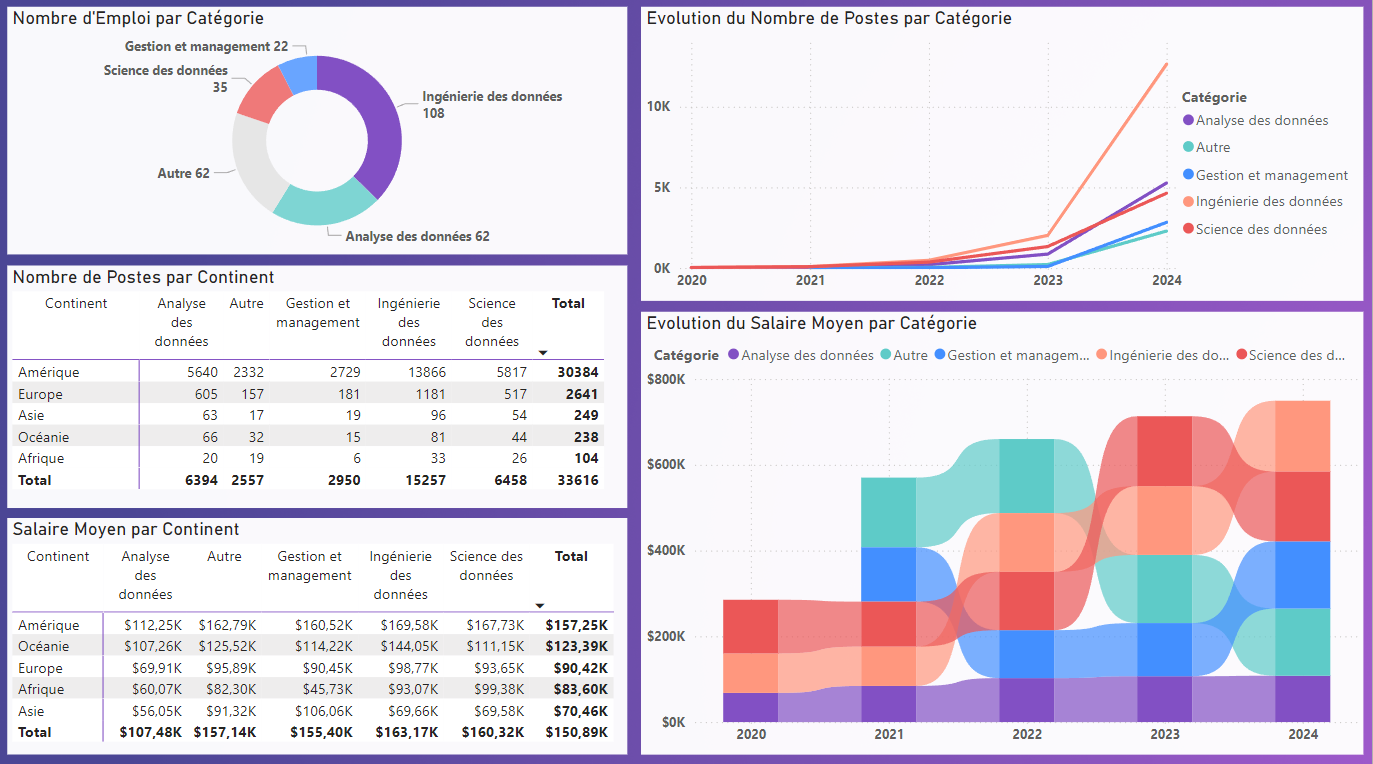

#### 1. **Quelle est la tendance salariale dans les métiers de la data ?**
En analysant le graphique "Évolution du Salaire Moyen par Catégorie" :  
- **Augmentation globale des salaires** : Tous les métiers de la data montrent une hausse significative des salaires depuis 2020.  
- **Classement des catégories les mieux rémunérées** :  
  - L'**Ingénierie des données** (orange) et la **Science des données** (rouge) dominent avec des niveaux de salaire moyens bien supérieurs, notamment en 2024 (au-delà de 160K$/an).  
  - Les autres catégories comme **Analyse des données** (violet) et **Gestion et management** (bleu) affichent des salaires moyens plus bas, mais en progression régulière.  
- **Évolution des écarts** : L'écart salarial se creuse entre les métiers techniques (ingénieurs et scientifiques) et les autres profils.

**Résumé :** Les métiers techniques, particulièrement en ingénierie et science des données, bénéficient d'une forte valorisation salariale, confirmant leur rôle stratégique dans le secteur.

#### 2. **Quels profils privilégier pour l'implantation d'un nouveau bureau ?**
Les données des graphiques "Nombre d'Emplois par Catégorie" et "Évolution du Nombre de Postes par Catégorie" montrent :  
- **Catégorie la plus dominante** : L'**Ingénierie des données** représente la majorité des emplois (108 postes), suivie par **Analyse des données** et la catégorie "Autre" (62 postes chacune).  
- **Croissance des postes** : L'ingénierie des données et la science des données enregistrent la progression la plus rapide depuis 2023, indiquant une demande croissante pour ces compétences.  
- **Impact stratégique** : Ces profils sont non seulement les plus recherchés, mais aussi les plus rémunérateurs, soulignant leur importance pour un nouveau bureau.

**Résumé :** Les profils techniques, principalement les ingénieurs et les scientifiques des données, devraient être la priorité pour maximiser l'efficacité et répondre à la demande.

#### 3. **Quelles recommandations peuvent être faites pour la prise de décision stratégique sur la localisation du futur bureau ?**
En combinant le tableau des postes et celui des salaires par continent :  
- **Concentration géographique** :  
  - L'**Amérique** domine avec 90,39 % des postes (30 384 sur 33 616), ce qui en fait le choix logique pour une implantation.  
  - Les autres continents (Europe, Asie, Océanie, Afrique) restent marginaux.  
- **Analyse des coûts** :  
  - Les salaires les plus élevés se trouvent en Amérique (ingénierie : 169,58K$, science : 167,73K$).  
  - L’**Europe** affiche des salaires plus abordables (125,42K$ pour l’ingénierie), ce qui peut offrir une solution intéressante pour limiter les coûts.
  
**Recommandation :**  
1. Priorité à l'**Amérique** pour sa densité d'emplois et sa forte dynamique.  
2. Explorer l’**Europe** si l’objectif est d’équilibrer coûts et opportunités.

#### **1ère Synthèse :**
1. La tendance des salaires dans la data confirme l'attractivité des métiers techniques comme l’ingénierie et la science des données.  
2. Les profils d'**ingénieurs des données** doivent être privilégiés pour l’implantation d’un bureau, suivis par les scientifiques des données.  
3. L'**Amérique** est l’emplacement clé, avec une alternative stratégique en Europe pour optimiser les coûts.

#### **2ème Analyse KPI**

![image2.png](attachment:image2.png)